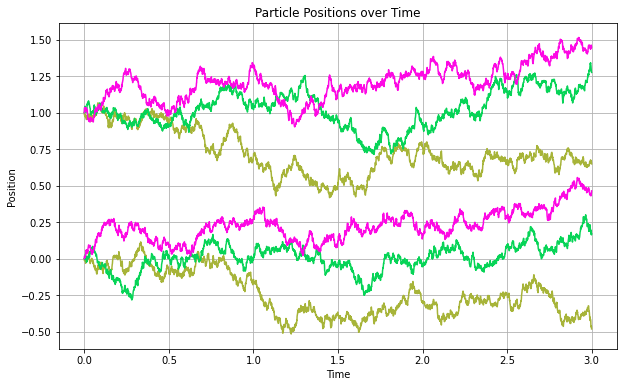

In [11]:
import numpy as np
import matplotlib.pyplot as plt

k = 1.0  # Spring constant
T = 1.0  # Temperature
gamma = .2  # Friction coefficient
distance=1. # Spring length at rest
dt = 0.001  # Time step
total_time = 3.0  # Total simulation time
num_steps = int(total_time / dt)

plt.figure(figsize=(10, 6))
N_trajectories=500
MSD1 = np.zeros((num_steps,N_trajectories))

for j in range(N_trajectories):
    x1 = 0.0
    x2 = 1.0
    v1 = 0.0
    v2 = 0.0

    positions1 = np.zeros(num_steps)
    positions2 = np.zeros(num_steps)
    squared_displacements = np.zeros(num_steps)

    for i in range(num_steps):
        
        f1 = np.random.normal(0, np.sqrt(2 * gamma * T / dt))/10.
        f2 = np.random.normal(0, np.sqrt(2 * gamma * T / dt))/10.

        f_spring = -k * (x2 - x1-distance)

        x1 += (-f_spring + f1) * dt / gamma
        x2 += (f_spring + f2) * dt / gamma

        positions1[i] = x1
        positions2[i] = x2

        MSD1[i,j] = x1**2

    positions1[0] = 0
    positions2[0] = 1
    col=np.random.rand(3)
    if j%200==0:
        plt.plot(np.arange(num_steps) * dt, positions1, color=col, label='Particle 1')
        plt.plot(np.arange(num_steps) * dt, positions2,color=col, label='Particle 2')

    plt.xlabel('Time')
    
plt.ylabel('Position')
plt.title('Particle Positions over Time')
plt.grid(True)
plt.savefig('traiettorie.pdf')
plt.show()

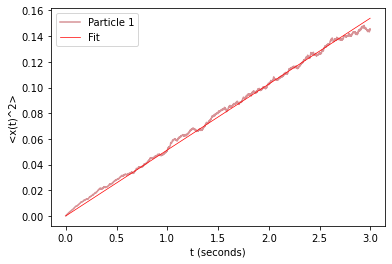

In [12]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import warnings
from scipy.optimize import OptimizeWarning

def model_function(x, a):
    return a*x

x_data = np.arange(num_steps) * dt
y_data=np.mean(MSD1, axis=1)

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=OptimizeWarning)
    popt, pcov = curve_fit(model_function, x_data, y_data)
    plt.plot(np.arange(num_steps) * dt, np.mean(MSD1, axis=1), color=col, label='Particle 1')
    plt.plot(x_data, model_function(x_data, *popt), 'r-',lw=0.7, label='Fit')
    plt.xlabel('t (seconds)')
    plt.ylabel('<x(t)^2>')
    plt.legend()
    plt.savefig('lineare.pdf')
    plt.show()

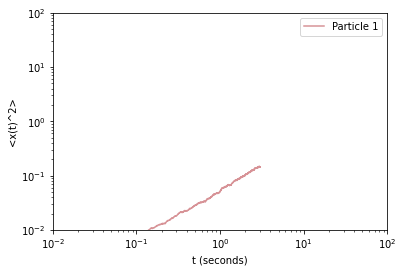

In [24]:
plt.xscale('log')
plt.yscale('log')
plt.xlim(0.01,100)
plt.ylim(0.01,100)
popt, pcov = curve_fit(model_function, x_data, y_data)
plt.plot(np.arange(num_steps) * dt, np.mean(MSD1, axis=1), color=col, label='Particle 1')
#plt.plot(x_data, model_function(x_data, *popt), 'r-',lw=0.7, label='Fit')
plt.xlabel('t (seconds)')
plt.ylabel('<x(t)^2>')
plt.legend()
plt.savefig('lineare.pdf')
plt.show()

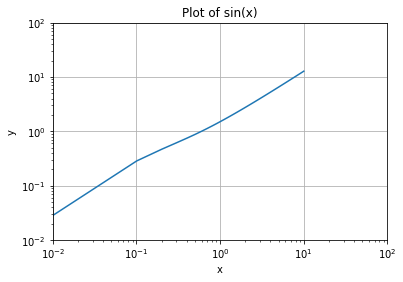

In [25]:
def func(t):
    return T/(4*k)*(1-np.exp(-2*k*t/gamma)) + T/(4*gamma)*t
plt.xscale('log')
plt.yscale('log')
plt.xlim(0.01,100)
plt.ylim(0.01,100)
x = np.linspace(0, 10, 100) 

y = func(x)

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of sin(x)')
plt.grid(True)
plt.show()